In [169]:
import os
from os.path import join

import numpy as np
import pandas as pd
import cv2

import tensorflow as tf
import keras
from keras import layers, Input, models
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Activation
from keras.layers.advanced_activations import LeakyReLU


# from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
import matplotlib.pyplot as plt

import sys


from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
cd /content/drive/MyDrive/test_colab/2021-2_TNT_Industrial_AI

/content/drive/MyDrive/test_colab/2021-2_TNT_Industrial_AI


In [ ]:
# import gan

In [ ]:
df = pd.read_pickle("/content/drive/Shareddrives/TNT/정규세션/2021년 2학기/산업인공지능/TASK2-wafer map /LSWMD.pkl")

In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


### EDA 

In [ ]:
df.describe()

,dieSize,waferIndex
count,811457.000000,811457.000000
mean,1840.998585,12.961207
std,2254.987374,7.207489
min,3.000000,1.000000
25%,710.000000,7.000000
50%,953.000000,13.000000
75%,1902.000000,19.000000
max,48099.000000,25.000000


In [ ]:
df["lotName"].value_counts().describe()

count    46293.000000
mean        17.528719
std          8.964477
min          1.000000
25%         10.000000
50%         24.000000
75%         25.000000
max         25.000000
Name: lotName, dtype: float64

In [ ]:
dataset = df.iloc[:,[0,1,4,5]]
dataset.tail()

,waferMap,dieSize,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[],[]


In [ ]:
typList = []
for typ in (dataset["failureType"]):

    if(len(typ) == 0):
        continue
    uni = typ[0][0]
    typList.append(uni)
    print(typList)

In [ ]:
typList = set(typList)
typList

{'Center',
 'Donut',
 'Edge-Loc',
 'Edge-Ring',
 'Loc',
 'Near-full',
 'Random',
 'Scratch',
 'none'}

# Data set 크기 변환

In [ ]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
dataset['waferMapDim']=dataset.waferMap.apply(find_dim)
dataset.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,waferMap,dieSize,trianTestLabel,failureType,waferMapDim
499106,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,[],[],"(32, 29)"
709214,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",516.0,[[Training]],[[none]],"(25, 27)"
734719,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",741.0,[[Test]],[[none]],"(33, 29)"
586804,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",515.0,[],[],"(25, 27)"
274107,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",1139.0,[],[],"(38, 38)"


In [ ]:
#FailureType 없으면 drop_idx추가
drop_idx = []
for i in range(len(dataset)):
    typ = dataset.iloc[i,3]
    if(len(typ) == 0):
        drop_idx.append(i)

        
    

In [ ]:
dataset_ = dataset.drop(drop_idx)

0

In [ ]:
dataset_

,waferMap,dieSize,trianTestLabel,failureType,waferMapDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]],"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]],"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]],"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]],"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]],"(45, 48)"
...,...,...,...,...,...
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,[[Test]],[[Edge-Loc]],"(26, 30)"
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,[[Test]],[[Edge-Loc]],"(26, 30)"
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Test]],[[Edge-Ring]],"(26, 30)"
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,[[Test]],[[Edge-Loc]],"(26, 30)"


In [ ]:
dataset_
label = list()
for i in range(len(dataset_)):
    if len(dataset_.iloc[i,4]) == 0:
        continue
    label.append(dataset_.iloc[i,3][0][0])

In [ ]:
# minor class 구분
Near_full=[]
Donut =[]
Rnd = []
Scratch = []
for k in range(len(dataset_)) :
    if label[k]== 'Near-full':
        Near_full.append(k)
    
    elif label[k]== 'Donut':
        Donut.append(k)

    elif label[k]== 'Random':
        Rnd.append(k)

    elif label[k]== 'Scratch':
        Scratch.append(k)

In [ ]:
# 가장 많은 shape 조사
Near_full_df = dataset_.iloc[Near_full,:] #(33,29)
Donut_df = dataset_.iloc[Donut,:] #(41,42)
Rnd_df = dataset_.iloc[Rnd,:] #(41,41)
Scratch_df = dataset_.iloc[Scratch,:] #(29,26)

In [ ]:
Scratch_df['waferMapDim'].describe()

count         1193
unique         157
top       (29, 26)
freq            80
Name: waferMapDim, dtype: object

In [ ]:
#Near_full

sub_df = Near_full_df[Near_full_df['waferMapDim'] == (33, 29)]
sub_wafer = sub_df['waferMap'].values

temp_nf = np.ones((1, 33, 29))
label = list()

for i in range(len(sub_df)):
    # skip null label

    temp_nf = np.concatenate((temp_nf, sub_df.iloc[i,:]['waferMap'].reshape(1, 33, 29)))
    # label.append(sub_df.iloc[i,:]['failureType'][0][0])
x_nf = temp_nf[1:]

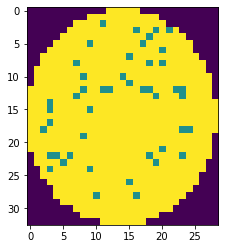

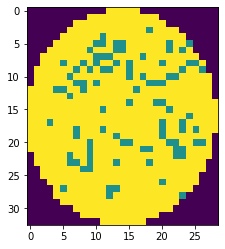

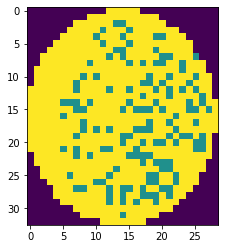

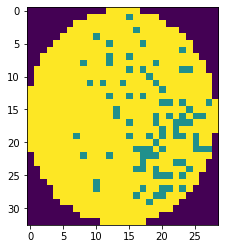

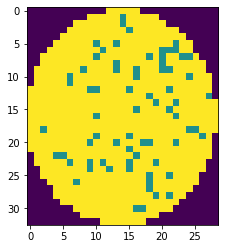

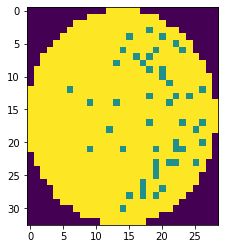

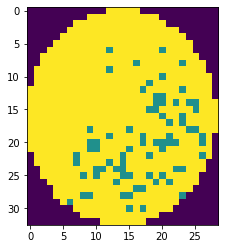

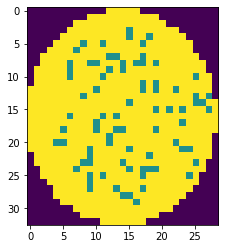

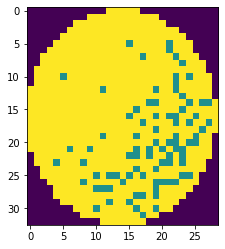

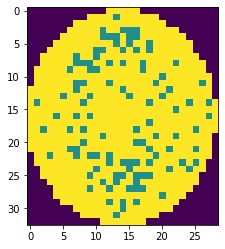

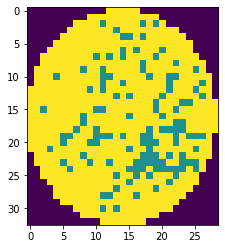

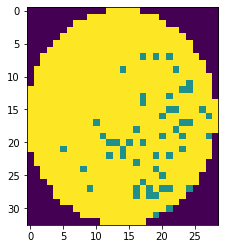

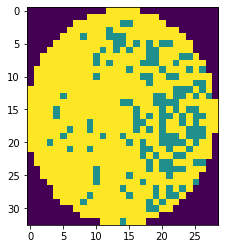

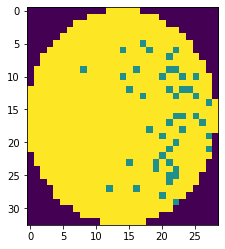

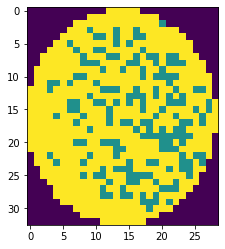

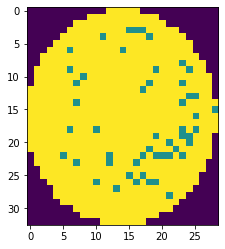

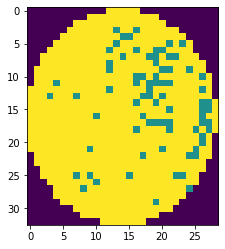

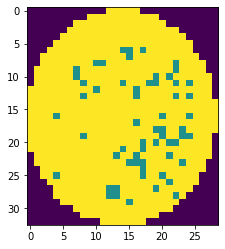

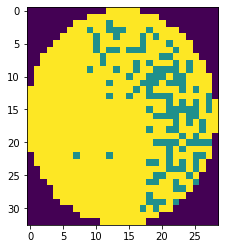

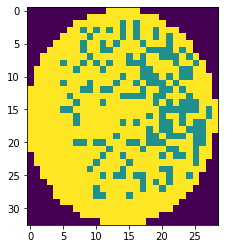

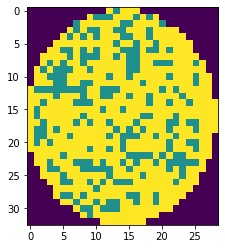

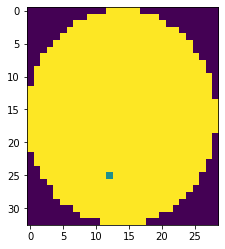

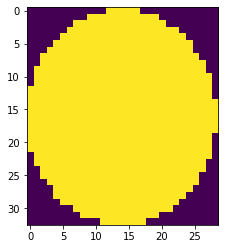

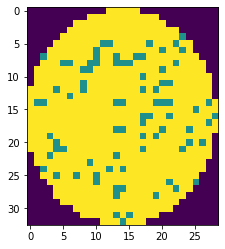

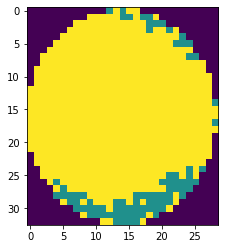

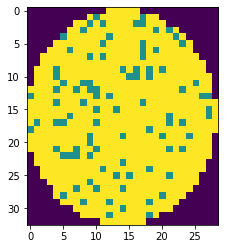

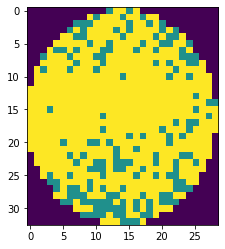

In [ ]:
for i in range(1,28):
    plt.imshow(x_nf[i,:,:])
    plt.show()

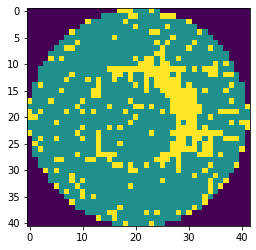

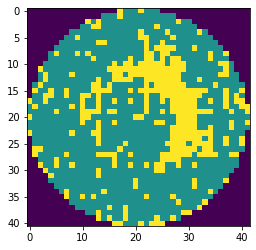

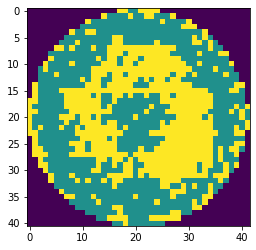

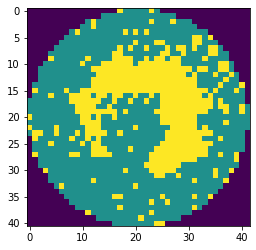

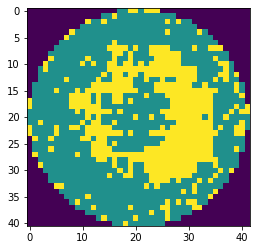

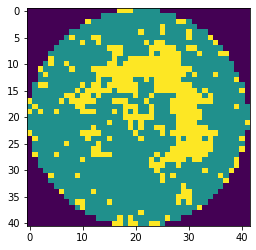

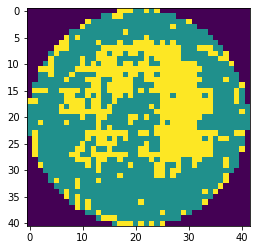

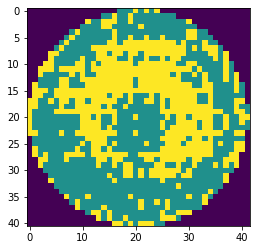

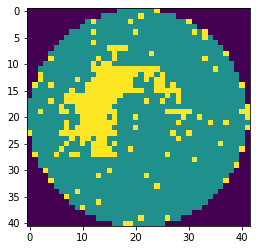

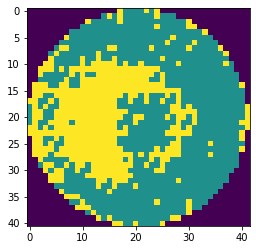

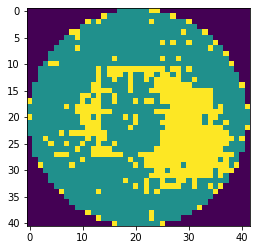

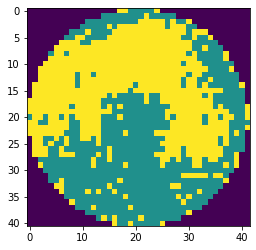

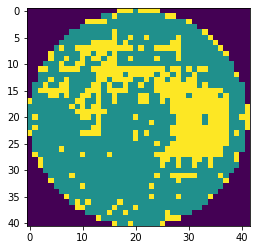

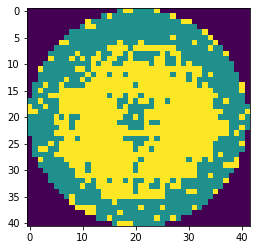

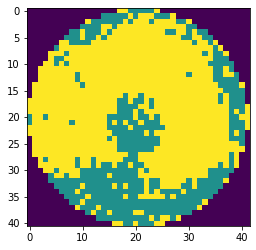

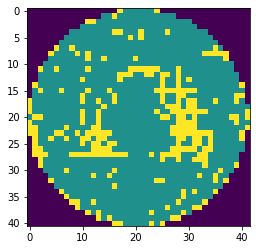

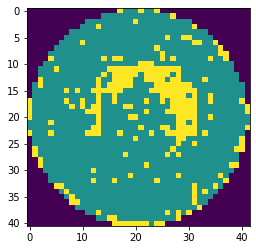

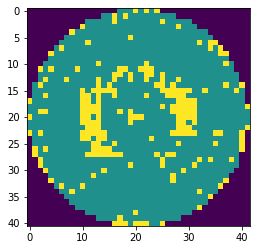

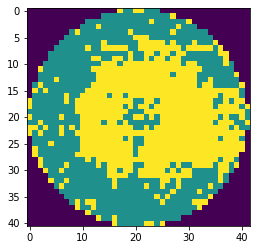

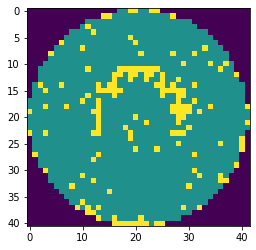

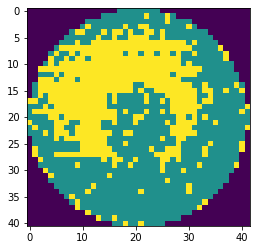

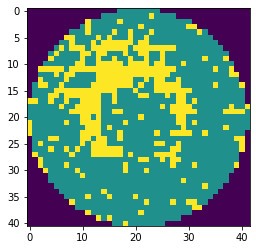

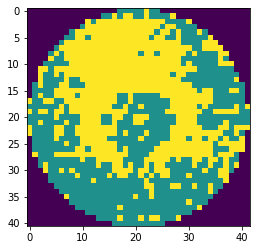

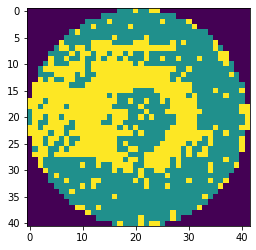

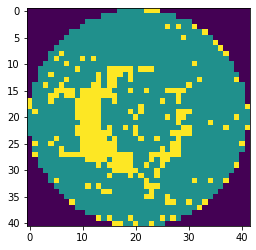

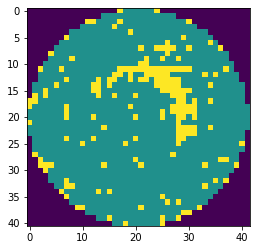

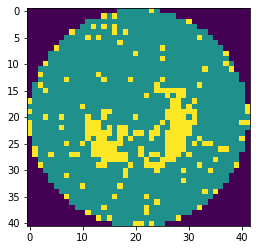

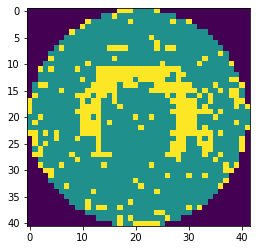

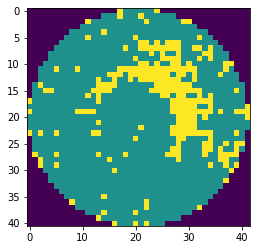

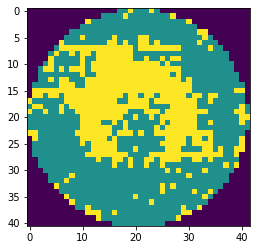

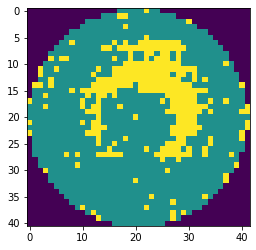

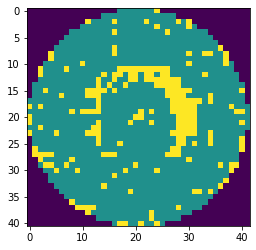

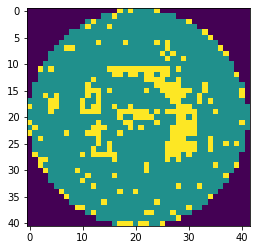

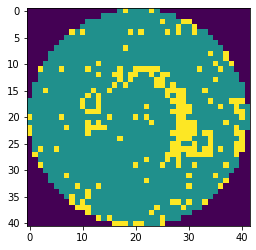

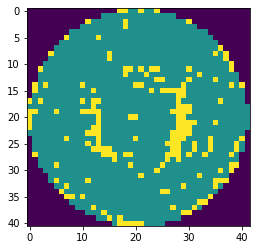

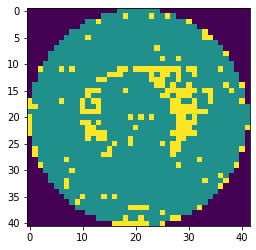

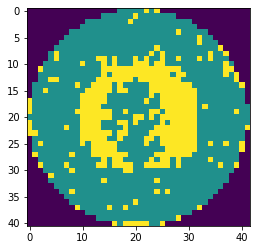

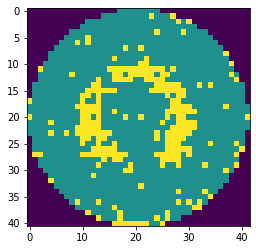

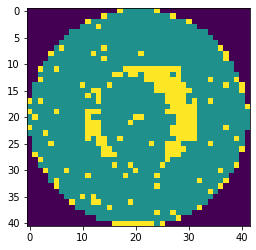

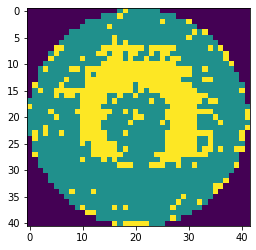

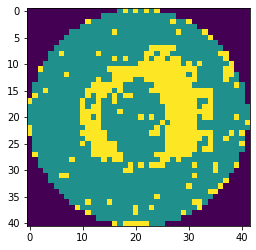

In [ ]:
#Donut

sub_df = Donut_df[Donut_df['waferMapDim'] == (41, 42)]
sub_wafer = dataset_['waferMap'].values

temp_dn = np.ones((1, 41, 42))
label = list()

for i in range(len(sub_df)):
    # skip null label

    temp_dn = np.concatenate((temp_dn, sub_df.iloc[i,:]['waferMap'].reshape(1, 41, 42)))

    # label.append(sub_df.iloc[i,:]['failureType'][0][0])
x_dn = temp_dn[1:]

for i in range(len(x_dn[0])):
    plt.imshow(x_dn[i,:,:])
    plt.show()

In [ ]:
#Random

sub_df = Rnd_df[Rnd_df['waferMapDim'] == (41, 41)]
sub_wafer = sub_df['waferMap'].values

temp_rd = np.ones((1, 41, 41))
label = list()

for i in range(len(sub_df)):
    # skip null label

    temp_rd = np.concatenate((temp_rd, sub_df.iloc[i,:]['waferMap'].reshape(1, 41, 41)))
    # label.append(sub_df.iloc[i,:]['failureType'][0][0])

x_rd = temp_rd[1:]

for i in range(len(x_rd[0])):
    plt.imshow(x_rd[i,:,:])
    plt.show()

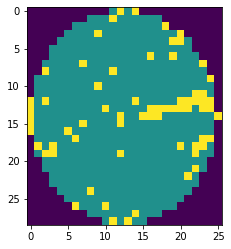

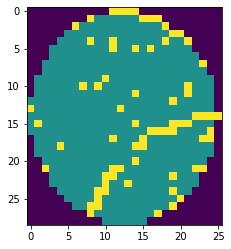

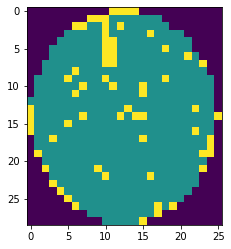

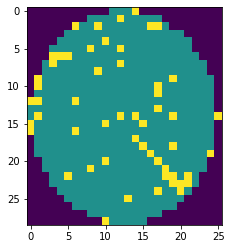

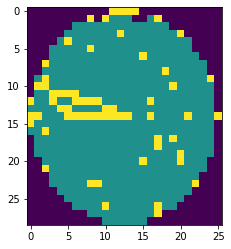

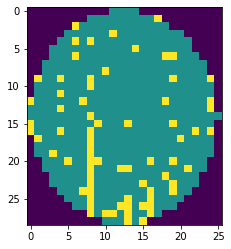

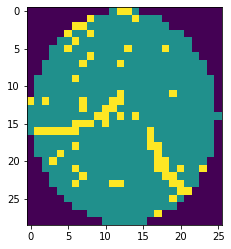

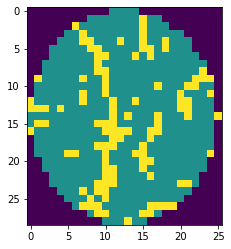

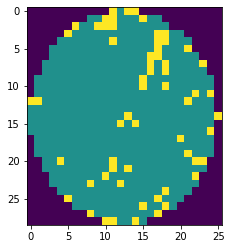

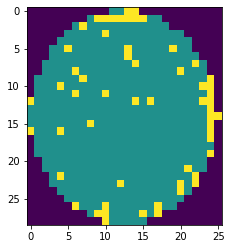

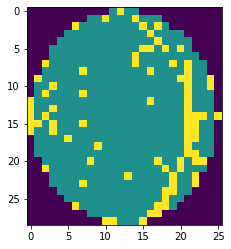

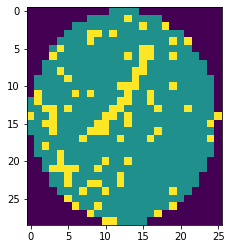

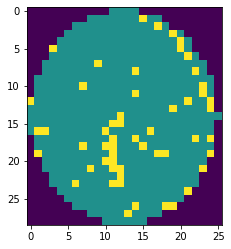

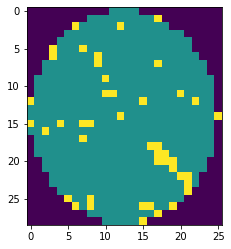

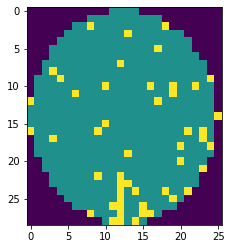

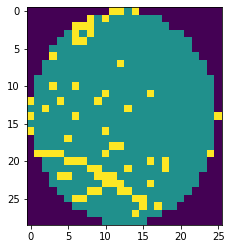

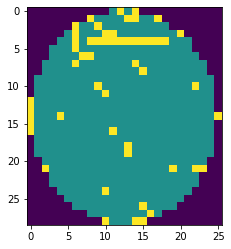

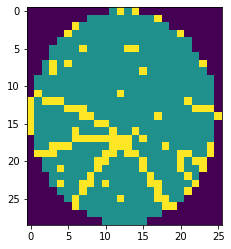

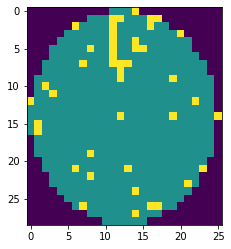

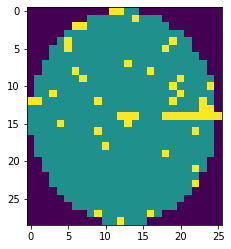

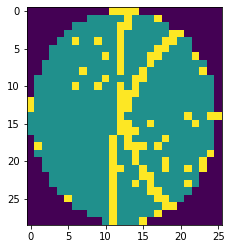

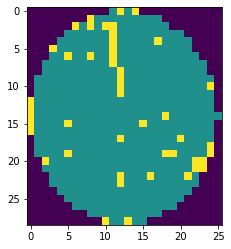

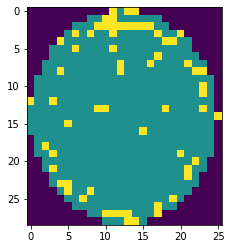

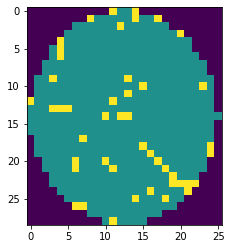

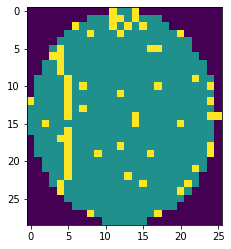

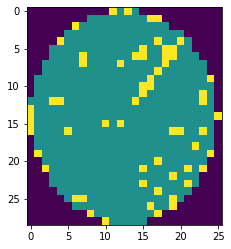

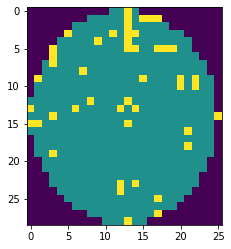

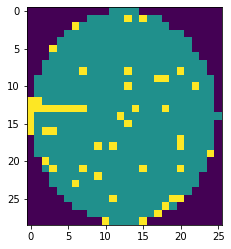

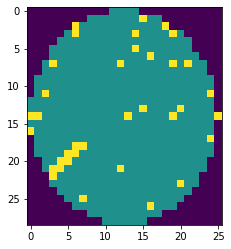

In [ ]:
#Scratch

sub_df = Scratch_df[Scratch_df['waferMapDim'] == (29, 26)]
sub_wafer = sub_df['waferMap'].values

temp_sc = np.ones((1, 29, 26))
label = list()

for i in range(len(sub_df)):
    # skip null label

    temp_sc = np.concatenate((temp_sc, sub_df.iloc[i,:]['waferMap'].reshape(1, 29, 26)))
    # label.append(sub_df.iloc[i,:]['failureType'][0][0])

x_sc = temp_sc[1:]

for i in range(len(x_sc[0])):
    plt.imshow(x_sc[i,:,:])
    plt.show()

In [ ]:
x_nf = sw[1:]

In [ ]:
sub_df = dataset_[dataset_['waferMapDim'] == (25, 27)]
sub_wafer = dataset_['waferMap'].values

sw = np.ones((1, 25, 27))
label = list()

for i in range(len(dataset_)):
    # skip null label
    if len(sub_df.iloc[i,:]['failureType']) == 0:
        continue
    sw = np.concatenate((sw, sub_df.iloc[i,:]['waferMap'].reshape(1, 25, 27)))
    label.append(sub_df.iloc[i,:]['failureType'][0][0])

In [ ]:
x = sw[1:]
y = np.array(label).reshape((-1,1))

In [ ]:
y = np.array(label).reshape((-1,1))
y.shape

(172950, 1)

In [ ]:
# check dimension
print('x shape : {}, y shape : {}'.format(x.shape, y.shape))

x shape : (18781, 25, 27), y shape : (18781, 1)


In [ ]:
#add channel
x = x.reshape((-1, 26, 26, 1))

In [ ]:
faulty_case = np.unique(y)
print('Faulty case list : {}'.format(faulty_case))

Faulty case list : ['Center' 'Donut' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random'
 'Scratch' 'none']


In [ ]:
faulty_case_dict =dict()

In [ ]:
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(y[y==f])))
    faulty_case_dict[i] = f

Center : 4294
Donut : 555
Edge-Loc : 5189
Edge-Ring : 9680
Loc : 3593
Near-full : 149
Random : 866
Scratch : 1193
none : 147431


In [ ]:
faulty_case_dict

{0: 'Center',
 1: 'Donut',
 2: 'Edge-Loc',
 3: 'Edge-Ring',
 4: 'Loc',
 5: 'Near-full',
 6: 'Random',
 7: 'Scratch',
 8: 'none'}

## 3채널 data shape 변경

In [ ]:
# new_x = np.zeros((len(x), 26, 26, 3))

# for w in range(len(x)):
#     for i in range(26):
#         for j in range(26):
#             new_x[w, i, j, int(x[w, i, j])] = 1

In [ ]:
# # check new x dimension
# new_x.shape

(14366, 26, 26, 3)

## Convolutional Autoencoder for augmentation.
불균형 문제를 해결할 필요성을 확인함. <br>
이미지 데이터인 wafermap을 convolution AE를 활용해 해결시도

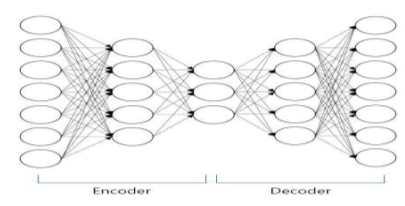

In [ ]:
# # parameter
# epoch=25
# batch_size=1024

In [ ]:
# # Encoder
# input_shape = (26, 26, 3)
# input_tensor = Input(input_shape)
# encode = layers.Conv2D(64, (3,3), padding='same', activation='relu')(input_tensor)

# latent_vector = layers.MaxPool2D()(encode)

# # Decoder
# decode_layer_1 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='relu')
# decode_layer_2 = layers.UpSampling2D()
# output_tensor = layers.Conv2DTranspose(3, (3,3), padding='same', activation='softmax')

# # connect decoder layers
# decode = decode_layer_1(latent_vector)
# decode = decode_layer_2(decode)

# ae = models.Model(input_tensor, output_tensor(decode))
# ae.compile(optimizer = 'Adam',
#               loss = 'mse',
#              )

Check summary

In [ ]:
# ae.summary()

In [ ]:
# # start train
# ae.fit(new_x, new_x,
#        batch_size=batch_size,
#        epochs=epoch,
#        verbose=2)

# GAN

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = x_nf

In [ ]:
x_tr_ = x_nf-1 # tanh 사용 위해(정확한값X)

In [ ]:
row, col = x_tr_[0].shape
Input_data_dim = row*col

In [ ]:
mean = np.mean(x)
print(mean) # 원래는 정규화 시킨 다음에 -1~1까지 스케일링 필요

1.4544334975369457


In [ ]:
x_tr = x_tr_.reshape(-1,size) # data flatten

In [178]:
x_tr.shape

(28, 957)

In [179]:
channels = 1
img_shape = (row * col,) 

z_dim = 100

## hidden layer 1

In [ ]:
ratio_1 = np.sqrt(Input_data_dim/100) # 2.6
hidden_dim = int(ratio_1*z_dim)
hidden_dim

260

In [ ]:
print("demension of hidden layer: {}  ".format(hidden_dim))

demension of hidden layer: 260  


In [ ]:
def generator(img_shape, z_dim):
    
    model = Sequential()

    model.add(Dense(units = hidden_dim, input_dim=z_dim, activation = 'relu')) #Hidden Layer 1

    model.add(Dense(26*26*1, activation='tanh')) #Output Layer
    model.add(Reshape(img_shape))

    z = Input(shape=(z_dim,))
    img = model(z)

    return Model(z, img)

In [ ]:
def discriminator(img_shape):
    
    model = Sequential()

    model.add(Dense(units = hidden_dim, input_shape=img_shape, activation = 'LeakyReLU')) #Hidden Layer 1

    model.add(Dense(1, activation='sigmoid'))

    img = Input(shape=img_shape)
    prediction = model(img)

    return Model(img, prediction)

## hidden layer 2

In [ ]:
ratio_2 =(Input_data_dim/100)**(1/3) 
hidden_dim_1 = int(ratio_2*z_dim)
hidden_dim_2 = int(ratio_2*ratio_2*z_dim)

In [ ]:
print("demension of hidden layer 1: {} \ndemension of hidden layer 2: {} ".format(hidden_dim_1, hidden_dim_2))

demension of hidden layer 1: 212 
demension of hidden layer 2: 450 


In [172]:
def generator(img_shape, z_dim):
    
    model = Sequential()

    model.add(Dense(units = hidden_dim_1, input_dim=z_dim, activation = 'relu')) #Hidden Layer1
    model.add(Dense(units = hidden_dim_2, activation = 'relu')) #Hidden Layer2
    model.add(Dense(col*row*1, activation='tanh'))  #Output Layer
    model.add(Reshape(img_shape))

    z = Input(shape=(z_dim,))
    img = model(z)

    return Model(z, img)

In [173]:
def discriminator(img_shape):
    
    model = Sequential()

    model.add(Dense(units = hidden_dim_1, input_shape=img_shape, activation = 'LeakyReLU')) #Hidden Layer2
    model.add(Dense(units = hidden_dim_2, activation = 'LeakyReLU')) #Hidden Layer2
    model.add(Dense(1, activation='sigmoid'))

    img = Input(shape=img_shape)
    prediction = model(img)

    return Model(img, prediction)

## combining G&D

In [ ]:
# #Hidden Layer 1
# D = discriminator(img_shape)
# D.compile(loss='binary_crossentropy', 
#                       optimizer='adam', metrics=['accuracy'])
# D.summary()
# # Build the Generator
# G = generator(img_shape, z_dim)
# G.summary()

# # Generated image to be used as input
# z = Input(shape=(100,))
# img = G(z)

# # Keep Discriminator’s parameters constant during Generator training
# D.trainable = False

# # The Discriminator’s prediction
# prediction = D(img)

# # Combined GAN model to train the Generator
# Gan = Model(z, prediction)
# Gan.compile(loss='binary_crossentropy', optimizer='adam')
# Gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 676)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 1)                 196141    
Total params: 196,141
Trainable params: 196,141
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 676)               328927    
Total params: 328,927
Trainable params: 328,927
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_______________

In [186]:
# Hidden Layer 2
D = discriminator(img_shape)
D.compile(loss='binary_crossentropy', 
                      optimizer='adam', metrics=['accuracy'])
D.summary()
# Build the Generator
G = generator(img_shape, z_dim)
G.summary()

# Generated image to be used as input
z = Input(shape=(100,))
img = G(z)
 
# Keep Discriminator’s parameters constant during Generator training
D.trainable = False

# The Discriminator’s prediction
prediction = D(img)

# Combined GAN model to train the Generator
Gan = Model(z, prediction)
Gan.compile(loss='binary_crossentropy', optimizer='adam')
Gan.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 957)]             0         
_________________________________________________________________
sequential_10 (Sequential)   (None, 1)                 299397    
Total params: 299,397
Trainable params: 299,397
Non-trainable params: 0
_________________________________________________________________
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
sequential_11 (Sequential)   (None, 957)               548869    
Total params: 548,869
Trainable params: 548,869
Non-trainable params: 0
_________________________________________________________________
Model: "model_15"
__________

In [187]:
losses = []
accuracies = []

def train(iterations, batch_size, sample_interval):
    
    data_slice = 50
    X_train = np.expand_dims(X_train, axis=3)


    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Discriminator loss
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Generator loss
        g_loss = combined.train_on_batch(z, real)

        if iteration % sample_interval == 0:
            
            # Output training progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % 
                         (iteration, d_loss[0], 100*d_loss[1], g_loss))
            
            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss[0], g_loss))
            accuracies.append(100*d_loss[1])

            # Output generated image samples 
            sample_images(iteration)

In [188]:
def get_batches(data,batch_size):
    batches = []
    for i in range(int(data.shape[0] // batch_size)):
        batch = data[i*batch_size: (i+1)* batch_size]
        batches.append(batch)
    return np.asarray(batches) #asarray?

In [193]:
def visualize_training(epoch, d_losses,g_losses):

    plt. figure(figsize=(8,4))
    plt.plot(d_losses, label = "Discriminator Loss")
    plt.plot(g_losses, label = 'Generator Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    print('epoch: {0}, D_Loss: {1}, G_Loss: {2}'.format(epoch,np.asarray(d_losses).mean(),np.asarray(g_losses).mean()))

    noise = np.random.normal(0, 1, size=(24, z_dim))
    generated_images = G.predict(noise)
    generated_images = generated_images.reshape(-1, row, col)
    
    plt.figure(figsize=(8, 4))
    for i in range(generated_images.shape[0]):
        plt.subplot(4, 6, i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [195]:
BATCH_SIZE = 16
EPOCHS= 1000

In [196]:
# # Hidden Layer 1
# d_losses = []
# g_losses = []

# for epoch in range(1, EPOCHS + 1):
#     # 각 배치별 학습
#     for real_images in get_batches(x_nf, BATCH_SIZE):
#         # 랜덤 노이즈 생성
#         input_noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, z_dim])
        
#         # 가짜 이미지 데이터 생성
#         generated_images = G.predict(input_noise)
        
#         # Gan에 학습할 X 데이터 정의
#         x_dis = np.concatenate([real_images, generated_images])
        
#         # Gan에 학습할 Y 데이터 정의
#         y_dis = np.zeros(2 * BATCH_SIZE)
#         y_dis[:BATCH_SIZE] = 0.9
        
#         # Discriminator 훈련
#         D.trainable = True
#         d_loss = D.train_on_batch(x_dis, y_dis)
        
#         # Gan 훈련
#         noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, z_dim])
#         y_gan = np.ones(BATCH_SIZE)
        
#         # Discriminator의 판별 학습을 방지합니다
#         D.trainable = False
#         g_loss = Gan.train_on_batch(noise, y_gan)
        
#     d_losses.append(d_loss)
#     g_losses.append(g_loss)
    
#     if epoch == 1 or epoch % 5 == 0:
#         visualize_training(epoch, d_losses, g_losses)
# # G.save('./HL1_generator_epoch50.h5')

In [197]:
# Hidden Layer 2
d_losses = []
g_losses = []

for epoch in range(1, EPOCHS + 1):
    # 각 배치별 학습
    for real_images in get_batches(x_tr, BATCH_SIZE):
        # 랜덤 노이즈 생성
        input_noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, z_dim])
        
        # 가짜 이미지 데이터 생성
        generated_images = G.predict(input_noise)
        
        # Gan에 학습할 X 데이터 정의
        x_dis = np.concatenate([real_images, generated_images])
        
        # Gan에 학습할 Y 데이터 정의
        y_dis = np.zeros(2 * BATCH_SIZE)
        y_dis[:BATCH_SIZE] = 0.9
        
        # Discriminator 훈련
        D.trainable = True
        d_loss = D.train_on_batch(x_dis, y_dis)
        
        # Gan 훈련
        noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, z_dim])
        y_gan = np.ones(BATCH_SIZE)
        
        # Discriminator의 판별 학습을 방지합니다
        D.trainable = False
        g_loss = Gan.train_on_batch(noise, y_gan)
        
    d_losses.append(d_loss)
    g_losses.append(g_loss)
    
    if epoch == 1 or epoch % 5 == 0:
        visualize_training(epoch, d_losses, g_losses)
G.save('./HL2_generator_epoch50.h5')

Output hidden; open in https://colab.research.google.com to view.

In [206]:
#학습이 잘 되진 않았지만 잘 되었다면 G.predict(noise)통해 배치 사이즈만큼 계속 생성 가능
r_noize = np.random.uniform(-1, 1, size=[BATCH_SIZE, 100])


newimage = G.predict(r_noize)
new_image = newimage.reshape(-1,row,col)
new_image[0].shape

(33, 29)

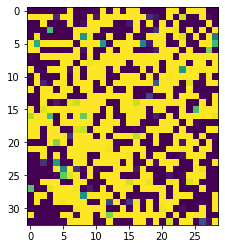

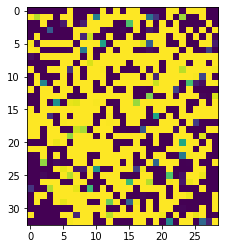

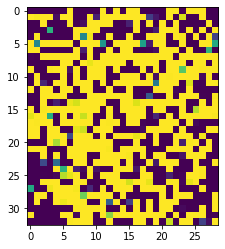

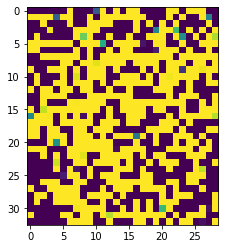

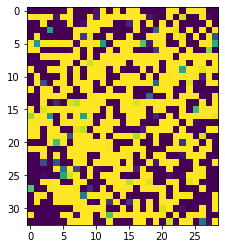

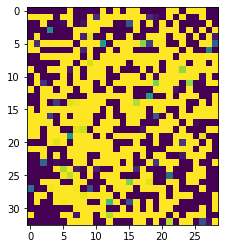

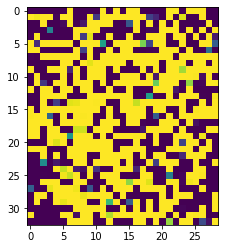

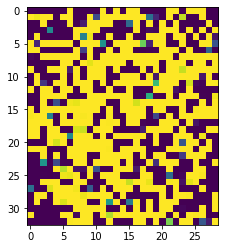

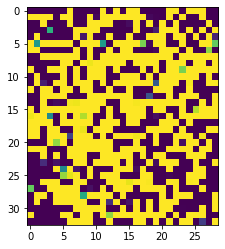

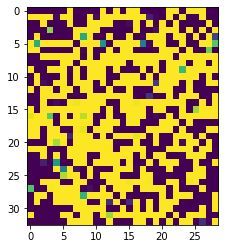

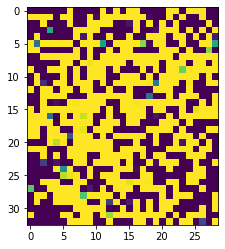

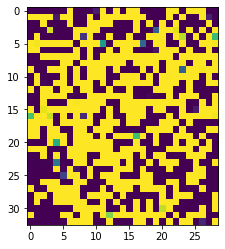

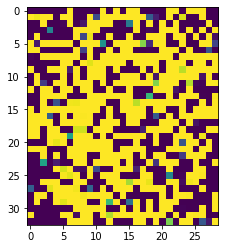

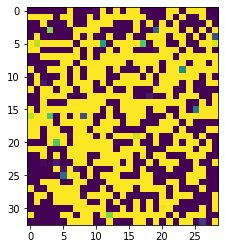

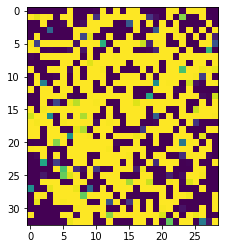

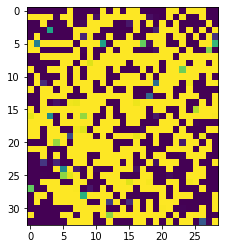

In [207]:
# ㅜㅜ
for image in range(len(new_image)):
    plt.imshow(new_image[image])
    plt.show()

In [ ]:
# # Make encoder model with part of autoencoder model layers
# encoder = models.Model(input_tensor, latent_vector)

In [ ]:
# # Make decoder model with part of autoencoder model layers
# decoder_input = Input((13, 13, 64))
# decode = decode_layer_1(decoder_input)
# decode = decode_layer_2(decode)

# decoder = models.Model(decoder_input, output_tensor(decode))

In [ ]:
# # Encode original faulty wafer
# encoded_x = encoder.predict(new_x)

In [ ]:
# # Add noise to encoded latent faulty wafers vector.
# noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64))

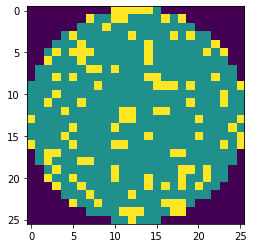

In [ ]:
# check original faulty wafer data
plt.imshow(np.argmax(new_x[3], axis=2))

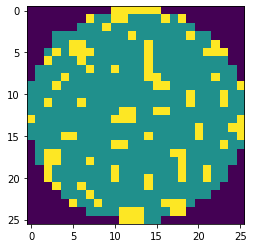

In [ ]:
# check new noised faulty wafer data
noised_gen_x = np.argmax(decoder.predict(noised_encoded_x), axis=3)
plt.imshow(noised_gen_x[3])

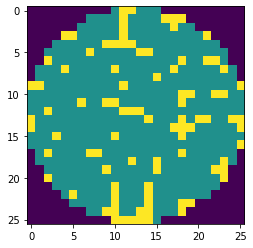

In [ ]:
# check reconstructed original faulty wafer data
gen_x = np.argmax(ae.predict(new_x), axis=3)
plt.imshow(gen_x[3])

## Data augmentation


In [ ]:
# augment function define
def gen_data(wafer, label):
    # Encode input wafer
    encoded_x = encoder.predict(wafer)
    
    # dummy array for collecting noised wafer
    gen_x = np.zeros((1, 26, 26, 3))
    
    # Make wafer until total # of wafer to 2000
    for i in range((2000//len(wafer)) + 1):
        noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64)) 
        noised_gen_x = decoder.predict(noised_encoded_x)
        gen_x = np.concatenate((gen_x, noised_gen_x), axis=0)
    gen_y = np.full((len(gen_x), 1), label)
    
    return gen_x[1:], gen_y[1:]

In [ ]:
# Augmentation for all faulty case.
for f in faulty_case : 
    # skip none case
    if f == 'none' : 
        continue
    
    gen_x, gen_y = gen_data(new_x[np.where(y==f)[0]], f)
    new_x = np.concatenate((new_x, gen_x), axis=0)
    y = np.concatenate((y, gen_y))

In [ ]:
print('After Generate new_x shape : {}, new_y shape : {}'.format(new_x.shape, y.shape))

After Generate new_x shape : (30707, 26, 26, 3), new_y shape : (30707, 1)


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(y[y==f])))

Center : 2160
Donut : 2002
Edge-Loc : 2368
Edge-Ring : 2046
Loc : 2376
Near-full : 2032
Random : 2146
Scratch : 2088
none : 13489


In [ ]:
# choice index without replace.
none_idx = np.where(y=='none')[0][np.random.choice(len(np.where(y=='none')[0]), size=11000, replace=False)]

In [ ]:
# delete choiced index data.
new_x = np.delete(new_x, none_idx, axis=0)
new_y = np.delete(y, none_idx, axis=0)

In [ ]:
print('After Delete "none" class new_x shape : {}, new_y shape : {}'.format(new_x.shape, new_y.shape))

After Delete "none" class new_x shape : (19707, 26, 26, 3), new_y shape : (19707, 1)


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(new_y[new_y==f])))

Center : 2160
Donut : 2002
Edge-Loc : 2368
Edge-Ring : 2046
Loc : 2376
Near-full : 2032
Random : 2146
Scratch : 2088
none : 2489


In [ ]:
from tensorflow.keras.utils import to_categorical
for i, l in enumerate(faulty_case):
    new_y[new_y==l] = i
    
new_y = to_categorical(new_y)

In [ ]:
# split data train, test
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y,
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
print('Train x : {}, y : {}'.format(x_train.shape, y_train.shape))
print('Test x: {}, y : {}'.format(x_test.shape, y_test.shape))

Train x : (13203, 26, 26, 3), y : (13203, 9)
Test x: (6504, 26, 26, 3), y : (6504, 9)


### 모델 생성

In [ ]:
input_shape = (26, 26, 3)
input_tensor = Input(input_shape)

def create_model():
    input_shape = (26, 26, 3)
    input_tensor = Input(input_shape)

    conv_1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_tensor)
    conv_2 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(conv_1)
    conv_3 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(conv_2)

    flat = layers.Flatten()(conv_3)

    dense_1 = layers.Dense(512, activation='relu')(flat)
    dense_2 = layers.Dense(128, activation='relu')(dense_1)
    output_tensor = layers.Dense(9, activation='softmax')(dense_2)

    model = models.Model(input_tensor, output_tensor)
    model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

### Cross validate model

In [ ]:
# Make keras model to sklearn classifier.
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=1024, verbose=2) 
# 3-Fold Crossvalidation
kfold = KFold(n_splits=3, shuffle=True, random_state=2019) 
results = cross_val_score(model, x_train, y_train, cv=kfold)
# Check 3-fold model's mean accuracy
print('Class Activation Map Cross validation score : {:.4f}'.format(np.mean(results)))

Epoch 1/10
9/9 - 9s - loss: 2.5826 - accuracy: 0.2797
Epoch 2/10
9/9 - 8s - loss: 1.1476 - accuracy: 0.5802
Epoch 3/10
9/9 - 8s - loss: 0.8387 - accuracy: 0.7537
Epoch 4/10
9/9 - 8s - loss: 0.6254 - accuracy: 0.8433
Epoch 5/10
9/9 - 9s - loss: 0.3590 - accuracy: 0.9024
Epoch 6/10
9/9 - 8s - loss: 0.2523 - accuracy: 0.9182
Epoch 7/10
9/9 - 9s - loss: 0.1604 - accuracy: 0.9539
Epoch 8/10
9/9 - 9s - loss: 0.1048 - accuracy: 0.9713
Epoch 9/10
9/9 - 8s - loss: 0.0668 - accuracy: 0.9824
Epoch 10/10
9/9 - 8s - loss: 0.0439 - accuracy: 0.9898
5/5 - 1s - loss: 0.0783 - accuracy: 0.9798
Epoch 1/10
9/9 - 9s - loss: 2.1457 - accuracy: 0.3133
Epoch 2/10
9/9 - 8s - loss: 1.1396 - accuracy: 0.5984
Epoch 3/10
9/9 - 8s - loss: 0.7799 - accuracy: 0.7247
Epoch 4/10
9/9 - 8s - loss: 0.4548 - accuracy: 0.8595
Epoch 5/10
9/9 - 8s - loss: 0.3110 - accuracy: 0.9017
Epoch 6/10
9/9 - 8s - loss: 0.2053 - accuracy: 0.9326
Epoch 7/10
9/9 - 8s - loss: 0.1428 - accuracy: 0.9580
Epoch 8/10
9/9 - 8s - loss: 0.0877 - a

Our model seems quite a good model.

In [ ]:
history = model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         epochs=50,
         batch_size=batch_size,
         )

Epoch 1/50
13/13 - 14s - loss: 1.8212 - accuracy: 0.4076 - val_loss: 0.8908 - val_accuracy: 0.6511
Epoch 2/50
13/13 - 14s - loss: 0.7001 - accuracy: 0.7344 - val_loss: 0.4876 - val_accuracy: 0.8507
Epoch 3/50
13/13 - 14s - loss: 0.3510 - accuracy: 0.8952 - val_loss: 0.2377 - val_accuracy: 0.9231
Epoch 4/50
13/13 - 14s - loss: 0.1494 - accuracy: 0.9550 - val_loss: 0.1206 - val_accuracy: 0.9611
Epoch 5/50
13/13 - 15s - loss: 0.0677 - accuracy: 0.9805 - val_loss: 0.0634 - val_accuracy: 0.9814
Epoch 6/50
13/13 - 16s - loss: 0.0362 - accuracy: 0.9920 - val_loss: 0.0368 - val_accuracy: 0.9897
Epoch 7/50
13/13 - 14s - loss: 0.0202 - accuracy: 0.9957 - val_loss: 0.0367 - val_accuracy: 0.9894
Epoch 8/50
13/13 - 15s - loss: 0.0119 - accuracy: 0.9982 - val_loss: 0.0373 - val_accuracy: 0.9880
Epoch 9/50
13/13 - 14s - loss: 0.0081 - accuracy: 0.9985 - val_loss: 0.0260 - val_accuracy: 0.9922
Epoch 10/50
13/13 - 14s - loss: 0.0070 - accuracy: 0.9986 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 11/

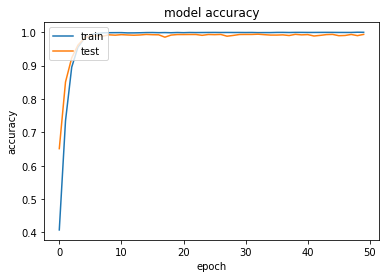

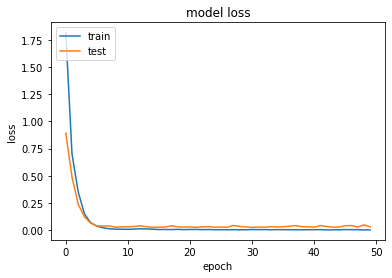

In [ ]:
# accuracy plot 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()